In [3]:
import numpy as np
import pandas as pd

In [4]:
# import libraries
import quandl
import matplotlib.pyplot as plt
# put your api key
quandl.ApiConfig.api_key = 'vH-1ocJiGzdqi5byHY4k'
# load the data
df = quandl.get("BITFINEX/BTCJPY")

In [5]:
df

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2018-03-29,7.994363e+05,7.342434e+05,769080.0,7.706760e+05,769070.0,769090.0,11.655926
2018-03-30,7.710971e+05,6.955769e+05,719800.0,7.187839e+05,719790.0,719810.0,288.789982
2018-03-31,7.661500e+05,7.234000e+05,737820.0,7.388100e+05,737810.0,737830.0,38.338285
2018-04-01,7.451446e+05,6.837212e+05,722880.0,7.226900e+05,722640.0,723120.0,76.712521
2018-04-02,7.552932e+05,7.212312e+05,743760.0,7.416444e+05,743750.0,743770.0,54.832632
...,...,...,...,...,...,...,...
2021-03-25,5.793800e+06,5.494700e+06,5669250.0,5.671300e+06,5668100.0,5670400.0,395.718555
2021-03-26,6.000272e+06,5.601300e+06,5958300.0,5.965086e+06,5958200.0,5958400.0,306.170485
2021-03-27,6.210100e+06,5.920300e+06,6180600.0,6.180900e+06,6180500.0,6180700.0,195.442708


In [6]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df_min_max = pd.DataFrame(mm.fit_transform(df),
                          index=df.index, columns=df.columns)

In [7]:
df_min_max

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2018-03-29,0.066627,0.060611,0.063032,0.063248,0.063033,0.063032,0.000486
2018-03-30,0.062162,0.054268,0.055216,0.055017,0.055216,0.055216,0.061378
2018-03-31,0.061383,0.058832,0.058074,0.058194,0.058074,0.058074,0.006349
2018-04-01,0.058073,0.052324,0.055704,0.055637,0.055668,0.055741,0.014780
2018-04-02,0.059672,0.058476,0.059016,0.058643,0.059017,0.059016,0.009973
...,...,...,...,...,...,...,...
2021-03-25,0.853507,0.841438,0.840235,0.840560,0.840059,0.840410,0.084873
2021-03-26,0.886037,0.858923,0.886080,0.887159,0.886072,0.886089,0.065197
2021-03-27,0.919096,0.911247,0.921339,0.921390,0.921330,0.921347,0.040868


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
interval = 6
def make_data(data):
    x = []
    y = []
    last = list(data["Last"])
    for i in range(len(last)):
        if i < interval: continue
        y.append(last[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xb = []
            for feature in data:
                features = data[feature]
                xb.append(features[d])
            xa.append(xb)
        x.append(xa)
    return (x, y)

In [10]:
train_df, test_df = train_test_split(df_min_max, test_size=0.2, shuffle=False)

In [11]:
train_x, train_y = make_data(train_df)
test_x, test_y = make_data(test_df)

In [12]:
train_x = np.array(train_x)
test_x = np.array(test_x)
print(train_x.shape)
print(test_x.shape)

(850, 6, 7)
(208, 6, 7)


In [13]:
train_y = np.array(train_y)
test_y = np.array(test_y)
print(train_y.shape)
print(test_y.shape)

(850,)
(208,)


In [14]:
train_x

array([[[0.06662722, 0.06061065, 0.06303213, ..., 0.06303253,
         0.06303173, 0.00048621],
        [0.06216228, 0.05426844, 0.05521596, ..., 0.05521631,
         0.05521561, 0.0613783 ],
        [0.06138285, 0.05883209, 0.05807406, ..., 0.05807443,
         0.05807369, 0.00634888],
        [0.05807337, 0.05232383, 0.05570447, ..., 0.05566834,
         0.0557406 , 0.01478049],
        [0.05967232, 0.05847635, 0.05901619, ..., 0.05901657,
         0.05901582, 0.00997303],
        [0.06663146, 0.06218637, 0.06602188, ..., 0.06602229,
         0.06602146, 0.00323558]],

       [[0.06216228, 0.05426844, 0.05521596, ..., 0.05521631,
         0.05521561, 0.0613783 ],
        [0.06138285, 0.05883209, 0.05807406, ..., 0.05807443,
         0.05807369, 0.00634888],
        [0.05807337, 0.05232383, 0.05570447, ..., 0.05566834,
         0.0557406 , 0.01478049],
        [0.05967232, 0.05847635, 0.05901619, ..., 0.05901657,
         0.05901582, 0.00997303],
        [0.06663146, 0.06218637, 0.066

In [15]:
batch_size=1
learning_rate=0.001
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras import optimizers
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(batch_size, 6, 7),
                    dropout=0.0, recurrent_dropout=0.0, stateful=True, return_sequences=True,
                    kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.4))
lstm_model.add(LSTM(60, dropout=0.0))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
optimizer = optimizers.RMSprop(lr=learning_rate)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [16]:
history = lstm_model.fit(train_x, train_y, epochs=10, verbose=2, batch_size=batch_size,
                        shuffle=False, validation_data=(test_x, test_y))

Epoch 1/10
850/850 - 7s - loss: 0.0023 - val_loss: 0.1436
Epoch 2/10
850/850 - 3s - loss: 4.0568e-04 - val_loss: 0.1459
Epoch 3/10
850/850 - 3s - loss: 2.8135e-04 - val_loss: 0.1514
Epoch 4/10
850/850 - 4s - loss: 1.5407e-04 - val_loss: 0.1472
Epoch 5/10
850/850 - 3s - loss: 1.1658e-04 - val_loss: 0.1535
Epoch 6/10
850/850 - 3s - loss: 8.2648e-05 - val_loss: 0.1522
Epoch 7/10
850/850 - 3s - loss: 9.0765e-05 - val_loss: 0.1549
Epoch 8/10
850/850 - 3s - loss: 9.1313e-05 - val_loss: 0.1472
Epoch 9/10
850/850 - 3s - loss: 1.0483e-04 - val_loss: 0.1489
Epoch 10/10
850/850 - 3s - loss: 1.0755e-04 - val_loss: 0.1526


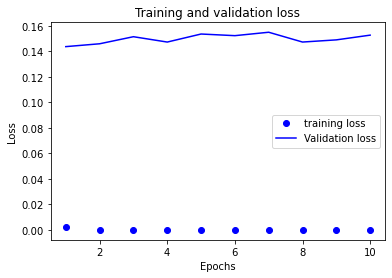

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()